In [1]:
import sys
sys.executable

'/home/kou-wang/anaconda3/bin/python'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
original_data = pd.read_csv("../Data/raw_data.csv")

In [4]:
df = original_data.copy()
df.shape

(10000, 10)

In [5]:
df['tokens'] = df['review/text'].apply(nltk.tokenize.word_tokenize)

In [6]:
df["review/score"].value_counts()

5.0    5755
4.0    1921
3.0     907
1.0     847
2.0     570
Name: review/score, dtype: int64

In [7]:
df.rename(columns={"review/score": "score"}, inplace=True)

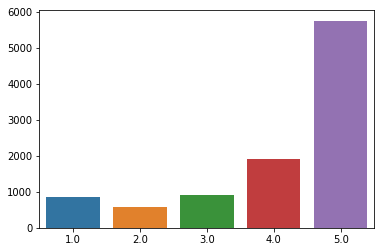

In [8]:
dat = df['score'].value_counts()
sns.barplot(x=dat.index, y=dat.values)

In [9]:
import itertools

list2d = df['tokens'].tolist()
merged = list(itertools.chain(*list2d))

In [10]:
from nltk.corpus import stopwords

In [11]:
punc_list = ['.', ',', 'I', 's', '!', 'The', "n't", ';', "'s", '(', ')', '``', "''", 'one', '&',
            '--', "'re", ':', '...', "'m", 'A', '?', "'ve", '-', '$']
clean_tokens = list()
sr = stopwords.words('english') + punc_list
for token in merged:
    if token not in sr:
        clean_tokens.append(token)

In [12]:
freq = nltk.FreqDist(clean_tokens)

In [13]:
freq

FreqDist({'book': 7686, 'It': 4393, 'This': 4108, 'like': 3694, 'quot': 3632, 'read': 3146, 'would': 2921, 'great': 2876, 'good': 2610, 'time': 2336, ...})

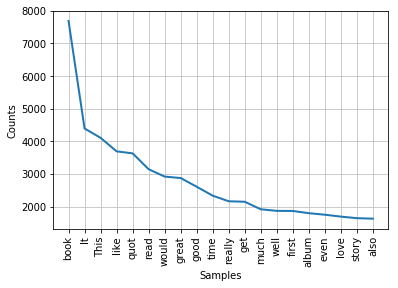

In [14]:
freq.plot(20, cumulative=False)

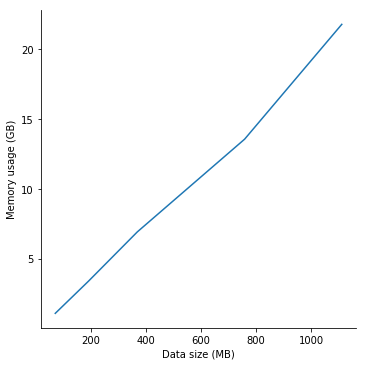

In [25]:
dat = pd.Series({70:1.08, 191:3.39, 368:6.91, 758:13.55, 1111:21.77})
ax = sns.relplot(data=dat, kind='line')
ax.set(xlabel='Data size (MB)', ylabel='Memory usage (GB)')
plt.show()

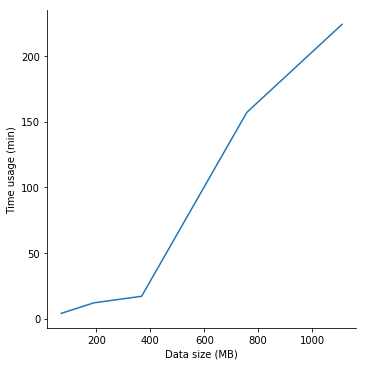

In [27]:
dat = pd.Series({70:4, 191:12, 368:17, 758:157, 1111:224})
ax = sns.relplot(data=dat, kind='line')
ax.set(xlabel='Data size (MB)', ylabel='Time usage (min)')
plt.show()